In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt

In [2]:
df_monday = pd.read_csv('monday.csv',delimiter =';')
df_monday

,timestamp,customer_no,location
0,2019-09-02 07:03:00,1,dairy
1,2019-09-02 07:03:00,2,dairy
2,2019-09-02 07:04:00,3,dairy
3,2019-09-02 07:04:00,4,dairy
4,2019-09-02 07:04:00,5,spices
...,...,...,...
4879,2019-09-02 21:49:00,1442,checkout
4880,2019-09-02 21:49:00,1444,checkout
4881,2019-09-02 21:49:00,1445,dairy
4882,2019-09-02 21:50:00,1446,dairy


In [3]:
df_monday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4884 entries, 0 to 4883
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   timestamp    4884 non-null   object
 1   customer_no  4884 non-null   int64 
 2   location     4884 non-null   object
dtypes: int64(1), object(2)
memory usage: 114.6+ KB


In [4]:
df_monday['date']= pd.to_datetime(df_monday['timestamp'])

In [5]:
#df_monday.rename(columns={'timestamp':'date'}, inplace = True)

In [6]:
df_monday.set_index('date', inplace= True)
df_monday

,timestamp,customer_no,location
date,,,
2019-09-02 07:03:00,2019-09-02 07:03:00,1,dairy
2019-09-02 07:03:00,2019-09-02 07:03:00,2,dairy
2019-09-02 07:04:00,2019-09-02 07:04:00,3,dairy
2019-09-02 07:04:00,2019-09-02 07:04:00,4,dairy
2019-09-02 07:04:00,2019-09-02 07:04:00,5,spices
...,...,...,...
2019-09-02 21:49:00,2019-09-02 21:49:00,1442,checkout
2019-09-02 21:49:00,2019-09-02 21:49:00,1444,checkout
2019-09-02 21:49:00,2019-09-02 21:49:00,1445,dairy


In [7]:
df_monday['customer_no'].unique() # number of customers 

array([   1,    2,    3, ..., 1445, 1446, 1447], dtype=int64)

In [8]:
#Calculate the total number of customers in each section

In [9]:
df_monday.groupby('location')['customer_no'].count()

location
checkout    1437
dairy        895
drinks       797
fruit       1005
spices       750
Name: customer_no, dtype: int64

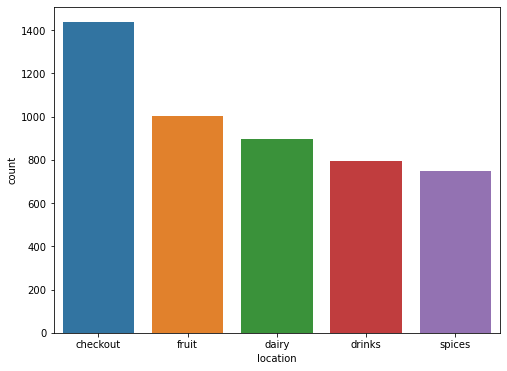

In [10]:
plt.figure(figsize=(8,6))
sns.countplot(df_monday['location'],order = df_monday['location'].value_counts().index)

In [11]:
df_monday['hour']= pd.to_datetime(df_monday['timestamp'].astype(str)).dt.hour
df_monday

,timestamp,customer_no,location,hour
date,,,,
2019-09-02 07:03:00,2019-09-02 07:03:00,1,dairy,7
2019-09-02 07:03:00,2019-09-02 07:03:00,2,dairy,7
2019-09-02 07:04:00,2019-09-02 07:04:00,3,dairy,7
2019-09-02 07:04:00,2019-09-02 07:04:00,4,dairy,7
2019-09-02 07:04:00,2019-09-02 07:04:00,5,spices,7
...,...,...,...,...
2019-09-02 21:49:00,2019-09-02 21:49:00,1442,checkout,21
2019-09-02 21:49:00,2019-09-02 21:49:00,1444,checkout,21
2019-09-02 21:49:00,2019-09-02 21:49:00,1445,dairy,21


In [12]:
df_monday.groupby('location')['timestamp'].describe()

,count,unique,top,freq
location,,,,
checkout,1437,700,2019-09-02 08:50:00,7
dairy,895,527,2019-09-02 08:46:00,6
drinks,797,514,2019-09-02 20:46:00,5
fruit,1005,577,2019-09-02 19:52:00,7
spices,750,479,2019-09-02 16:57:00,5


In [13]:
#Calculate the total number of customers in each section over time

In [14]:
df_monday.groupby(['timestamp','location'])['customer_no'].count()

timestamp            location
2019-09-02 07:03:00  dairy       2
2019-09-02 07:04:00  dairy       2
                     fruit       1
                     spices      3
2019-09-02 07:05:00  checkout    2
                                ..
2019-09-02 21:49:00  dairy       1
                     fruit       2
                     spices      2
2019-09-02 21:50:00  dairy       1
                     fruit       1
Name: customer_no, Length: 2797, dtype: int64

In [15]:
df_monday.groupby(['hour','location'])['customer_no'].count()

hour  location
7     checkout    92
      dairy       59
      drinks      60
      fruit       54
      spices      52
                  ..
21    checkout    52
      dairy       22
      drinks      28
      fruit       33
      spices      18
Name: customer_no, Length: 75, dtype: int64

In [16]:
#plt.figure(figsize=(17,6))
#df_monday.groupby(['hour','location'])['customer_no'].count().plot.bar()

In [17]:
#Display the number of customers at checkout over time

In [18]:
df_checkout =  df_monday.loc[df_monday['location'] == 'checkout']#.groupby('hour')['customer_no'].count()
df_checkout

,timestamp,customer_no,location,hour
date,,,,
2019-09-02 07:05:00,2019-09-02 07:05:00,1,checkout,7
2019-09-02 07:05:00,2019-09-02 07:05:00,5,checkout,7
2019-09-02 07:06:00,2019-09-02 07:06:00,2,checkout,7
2019-09-02 07:06:00,2019-09-02 07:06:00,3,checkout,7
2019-09-02 07:07:00,2019-09-02 07:07:00,8,checkout,7
...,...,...,...,...
2019-09-02 21:47:00,2019-09-02 21:47:00,1438,checkout,21
2019-09-02 21:48:00,2019-09-02 21:48:00,1431,checkout,21
2019-09-02 21:48:00,2019-09-02 21:48:00,1434,checkout,21


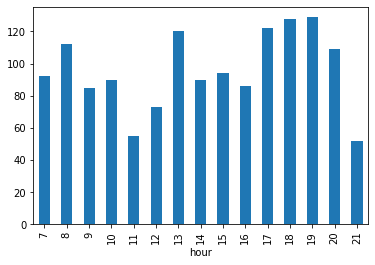

In [19]:
df_checkout.groupby('hour')['customer_no'].count().plot.bar()

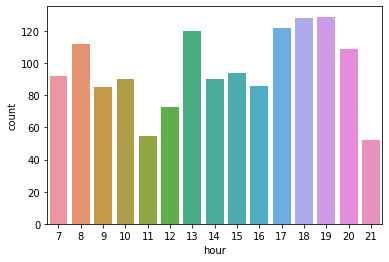

In [20]:
sns.countplot(df_checkout['hour'])

In [21]:
#Calculate the time each customer spent in the market

In [69]:
df_arrival = df_monday.groupby(['customer_no'], as_index = False) ['timestamp'].min()

In [70]:
df_leave= df_monday.groupby(['customer_no'], as_index = False) ['timestamp'].max()

In [71]:
df_time = pd.merge(df_arrival, df_leave, on='customer_no', how='inner')
df_time

,customer_no,timestamp_x,timestamp_y
0,1,2019-09-02 07:03:00,2019-09-02 07:05:00
1,2,2019-09-02 07:03:00,2019-09-02 07:06:00
2,3,2019-09-02 07:04:00,2019-09-02 07:06:00
3,4,2019-09-02 07:04:00,2019-09-02 07:08:00
4,5,2019-09-02 07:04:00,2019-09-02 07:05:00
...,...,...,...
1442,1443,2019-09-02 21:47:00,2019-09-02 21:48:00
1443,1444,2019-09-02 21:48:00,2019-09-02 21:49:00
1444,1445,2019-09-02 21:49:00,2019-09-02 21:49:00
1445,1446,2019-09-02 21:50:00,2019-09-02 21:50:00


In [80]:
df_time.rename(columns={'timestamp_x':'arrival_time','timestamp_y':'leave_time'}, inplace = True)

In [82]:
df_time['spent'] = pd.to_datetime(df_time['leave_time']) - pd.to_datetime(df_time['arrival_time'])
df_time

,customer_no,arrival_time,leave_time,spent
0,1,2019-09-02 07:03:00,2019-09-02 07:05:00,00:02:00
1,2,2019-09-02 07:03:00,2019-09-02 07:06:00,00:03:00
2,3,2019-09-02 07:04:00,2019-09-02 07:06:00,00:02:00
3,4,2019-09-02 07:04:00,2019-09-02 07:08:00,00:04:00
4,5,2019-09-02 07:04:00,2019-09-02 07:05:00,00:01:00
...,...,...,...,...
1442,1443,2019-09-02 21:47:00,2019-09-02 21:48:00,00:01:00
1443,1444,2019-09-02 21:48:00,2019-09-02 21:49:00,00:01:00
1444,1445,2019-09-02 21:49:00,2019-09-02 21:49:00,00:00:00
1445,1446,2019-09-02 21:50:00,2019-09-02 21:50:00,00:00:00


In [83]:
df_time['spent'].max()

Timedelta('0 days 00:51:00')

In [84]:
df_time['spent'].min()

Timedelta('0 days 00:00:00')

In [85]:
#Calculate the total number of customers present in the supermarket over time

In [111]:
df_monday.groupby(['hour'])['customer_no'].nunique()

hour
7     102
8     123
9      99
10     94
11     60
12     84
13    130
14     96
15    100
16     99
17    131
18    148
19    140
20    116
21     62
Name: customer_no, dtype: int64

In [87]:
#Plot the distribution of customers of their first visited section versus following sections 

In [88]:
df_monday.groupby(['location','customer_no']).count()

timestamp  hour
location customer_no                 
checkout 1                    1     1
         2                    1     1
         3                    1     1
         4                    1     1
         5                    1     1
...                         ...   ...
spices   1437                 1     1
         1438                 1     1
         1440                 1     1
         1441                 1     1
         1444                 1     1

[4229 rows x 2 columns]

In [89]:
df_monday[df_monday['customer_no'] == 10]

,timestamp,customer_no,location,hour
date,,,,
2019-09-02 07:06:00,2019-09-02 07:06:00,10,fruit,7
2019-09-02 07:08:00,2019-09-02 07:08:00,10,checkout,7


In [102]:
df_monday[df_monday['customer_no'] == 10].resample('T').ffill()

,timestamp,customer_no,location,hour
date,,,,
2019-09-02 07:06:00,2019-09-02 07:06:00,10,fruit,7
2019-09-02 07:07:00,2019-09-02 07:06:00,10,fruit,7
2019-09-02 07:08:00,2019-09-02 07:08:00,10,checkout,7


In [103]:
df_new= df_monday.groupby('customer_no').resample('T').ffill()
df_new

timestamp  customer_no  location  \
customer_no date                                                              
1           2019-09-02 07:03:00  2019-09-02 07:03:00            1     dairy   
            2019-09-02 07:04:00  2019-09-02 07:03:00            1     dairy   
            2019-09-02 07:05:00  2019-09-02 07:05:00            1  checkout   
2           2019-09-02 07:03:00  2019-09-02 07:03:00            2     dairy   
            2019-09-02 07:04:00  2019-09-02 07:03:00            2     dairy   
...                                              ...          ...       ...   
1444        2019-09-02 21:48:00  2019-09-02 21:48:00         1444    spices   
            2019-09-02 21:49:00  2019-09-02 21:49:00         1444  checkout   
1445        2019-09-02 21:49:00  2019-09-02 21:49:00         1445     dairy   
1446        2019-09-02 21:50:00  2019-09-02 21:50:00         1446     dairy   
1447        2019-09-02 21:50:00  2019-09-02 21:50:00         1447     fruit   

                                 hour  
customer_no date                       
1           2019-09-02 07:03:00     7  
            2019-09-02 07:04:00     7  
            2019-09-02 07:05:00     7  
2           2019-09-02 07:03:00     7  
            2019-09-02 07:04:00     7  
...                               ...  
1444        2019-09-02 21:48:00    21  
            2019-09-02 21:49:00    21  
1445        2019-09-02 21:49:00    21  
1446        2019-09-02 21:50:00    21  
1447        2019-09-02 21:50:00    21  

[10765 rows x 4 columns]